# 데이터 로드

In [8]:
from sklearn.datasets import load_iris

# Iris 데이터셋 로드
iris = load_iris()

# 데이터와 타겟을 분리
X = iris.data
y = iris.target

print("Features:", X.shape)
print("Target:", y.shape)

Features: (150, 4)
Target: (150,)


In [68]:
dict(enumerate(iris.target_names))

{0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}

In [9]:
# 로컬디스크에 데이터셋 저장
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 3. 라벨(종)을 숫자에서 이름으로 변환
iris_df['Label'] = iris.target
iris_df['Label'] = iris_df['Label'].map(dict(enumerate(iris.target_names)))

# 4. DataFrame을 CSV 파일로 저장
file_path = 'iris_dataset.csv'
iris_df.to_csv(file_path, index=False)


In [11]:
from google.colab import drive
import os

drive.mount('/content/drive')
print(os.getcwd())
#$ls /content/
# Google Drive에 파일 저장
file_path = '/content/drive/MyDrive/SeSAC/iris_dataset.csv'
iris_df.to_csv(file_path, index=False)
# Google Drive에서 데이터 로드
myData = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


### 파일 위치를 찾는 법

- 리눅스의 `ls` 명령어로 디렉토리의 파일 위치를 찾는다
- 현재의 위치를 모르겠으면 `!pwd` 로 현재 디렉토리를 찾는다


In [12]:
!pwd

/content


In [13]:
!ls /content/drive/MyDrive/SeSAC

 2_matplotlib.ipynb		       'Data (1)'
 2_전처리.ipynb			        iris_dataset.csv
 2_주요라이브러리.ipynb		        No01_iris_data.ipynb
 3_분류_로지스틱_소프트맥스_ANN.ipynb   part3_1.회귀.ipynb
 3_인공지능_알고리즘.ipynb	        part3_2.분류.ipynb
 3_준지도학습.ipynb		        part3_3.군집.ipynb
 4_시스템설계.ipynb		        part5.ipynb
 Data


In [15]:
# 전처리를 위한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 파일 로드
colab_path = "drive/My Drive/"
#df = pd.read_csv(colab_path + 'part3_iris_modified.csv')
df = myData

### 라이브러리 로드

In [16]:
# 전처리를 위한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Iris Dataset 분석

In [17]:
from sklearn.datasets import load_iris

# Iris 데이터셋 로드
iris = load_iris()

# 데이터와 타겟을 분리
X = iris.data
y = iris.target

print("Features:", X.shape)
print("Target:", y.shape)

Features: (150, 4)
Target: (150,)


In [18]:
feature_names = [name.split()[0]+'_'+name.split()[1] for name in iris.feature_names]
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [19]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### iris 데이터셋을 디스크에 저장한다.
   local disk는 재구동하면 데이터가 사라짐

In [20]:
# 로컬디스크에 데이터셋 저장
feature_names = [name.split()[0]+'_'+name.split()[1] for name in iris.feature_names]
feature_names

iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

# 3. 라벨(종)을 숫자에서 이름으로 변환
iris_df['Label'] = iris.target
iris_df['Label'] = iris_df['Label'].map(dict(enumerate(iris.target_names)))


# 4. DataFrame을 CSV 파일로 저장
file_path = 'iris_dataset.csv'
iris_df.to_csv(file_path, index=False)

In [21]:
from google.colab import drive
drive.mount('/content/drive')

# Google Drive에 파일 저장
file_path = '/content/drive/MyDrive/SeSAC/iris_dataset.csv'

feature_names = [name.split()[0]+'_'+name.split()[1] for name in iris.feature_names]
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

iris_df.to_csv(file_path, index=False)
# Google Drive에서 데이터 로드
myData = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.DataFrame(data=iris.data, columns=feature_names)

# 3. 라벨(종)을 숫자에서 이름으로 변환
df['Label'] = iris.target
df['Label'] = df['Label'].map(dict(enumerate(iris.target_names)))

# 4. DataFrame을 CSV 파일로 저장
path = 'iris_dataset.csv'
df.to_csv(file_path, index=False)

# 분석용 데이터 준비 - 결측치 처리

In [23]:
# 로드된 데이터 확인
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Label'], dtype='object')

### 결측치 존재 확인

In [24]:

feature_names = [name.split()[0]+'_'+name.split()[1] for name in iris.feature_names]
feature_names

# data 오염
df = pd.read_csv(file_path)
df.loc[(df['sepal_width'] > 3.0) & (df['sepal_width'] < 3.2), 'sepal_width'] = np.nan
df.loc[(df['petal_length'] >6.0), 'petal_length'] = 30


In [25]:
#결측치존재여부확인
# isnull(), isna()동일
df.isnull().sum()


,0
sepal_length,0
sepal_width,11
petal_length,0
petal_width,0
Label,0


In [26]:
# True = 1로도해석된다는점을이용하여평균값산정(= Column별결측치비율)
df.isnull().mean() * 100

,0
sepal_length,0.000000
sepal_width,7.333333
petal_length,0.000000
petal_width,0.000000
Label,0.000000


In [28]:
 #결측치를포함하는데이터만추출하여확인
# isnull()이True인행만select
df[df['sepal_width'].isnull()]

,sepal_length,sepal_width,petal_length,petal_width,Label
3,4.6,NaN,1.5,0.2,setosa
9,4.9,NaN,1.5,0.1,setosa
30,4.8,NaN,1.6,0.2,setosa
34,4.9,NaN,1.5,0.2,setosa
52,6.9,NaN,4.9,1.5,versicolor
65,6.7,NaN,4.4,1.4,versicolor
86,6.7,NaN,4.7,1.5,versicolor
137,6.4,NaN,5.5,1.8,virginica
139,6.9,NaN,5.4,2.1,virginica
140,6.7,NaN,5.6,2.4,virginica


### 결측치 포함 데이터를 제외

In [29]:
 #결측치포함한데이터를제거
df_processed = df.dropna()
len(df_processed)

139

### 결측치를 평균 값으로 대체

In [30]:
#대체할값계산
replace_value = df['sepal_width'].mean().round(2)
replace_value

np.float64(3.05)

In [39]:
 #결측치대체
df_processed = df.fillna({'sepal_width':replace_value})
df_processed

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.50,1.4,0.2,setosa
1,4.9,3.00,1.4,0.2,setosa
2,4.7,3.20,1.3,0.2,setosa
3,4.6,3.05,1.5,0.2,setosa
4,5.0,3.60,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,virginica
146,6.3,2.50,5.0,1.9,virginica
147,6.5,3.00,5.2,2.0,virginica
148,6.2,3.40,5.4,2.3,virginica


### 결측치를 이전/다음 값으로 대체

In [31]:
# ffill: forward-fill (이전값으로 대체)
# bfill: back-fill (뒤에오는 값으로 대체)
df_processed = df.fillna(method="ffill")
df_processed

/tmp/ipython-input-31-1545287135.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_processed = df.fillna(method="ffill")


,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.2,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 분석용 데이터 준비 - 이상값 처리

### 기초 통계량 추출 (박스 플롯)

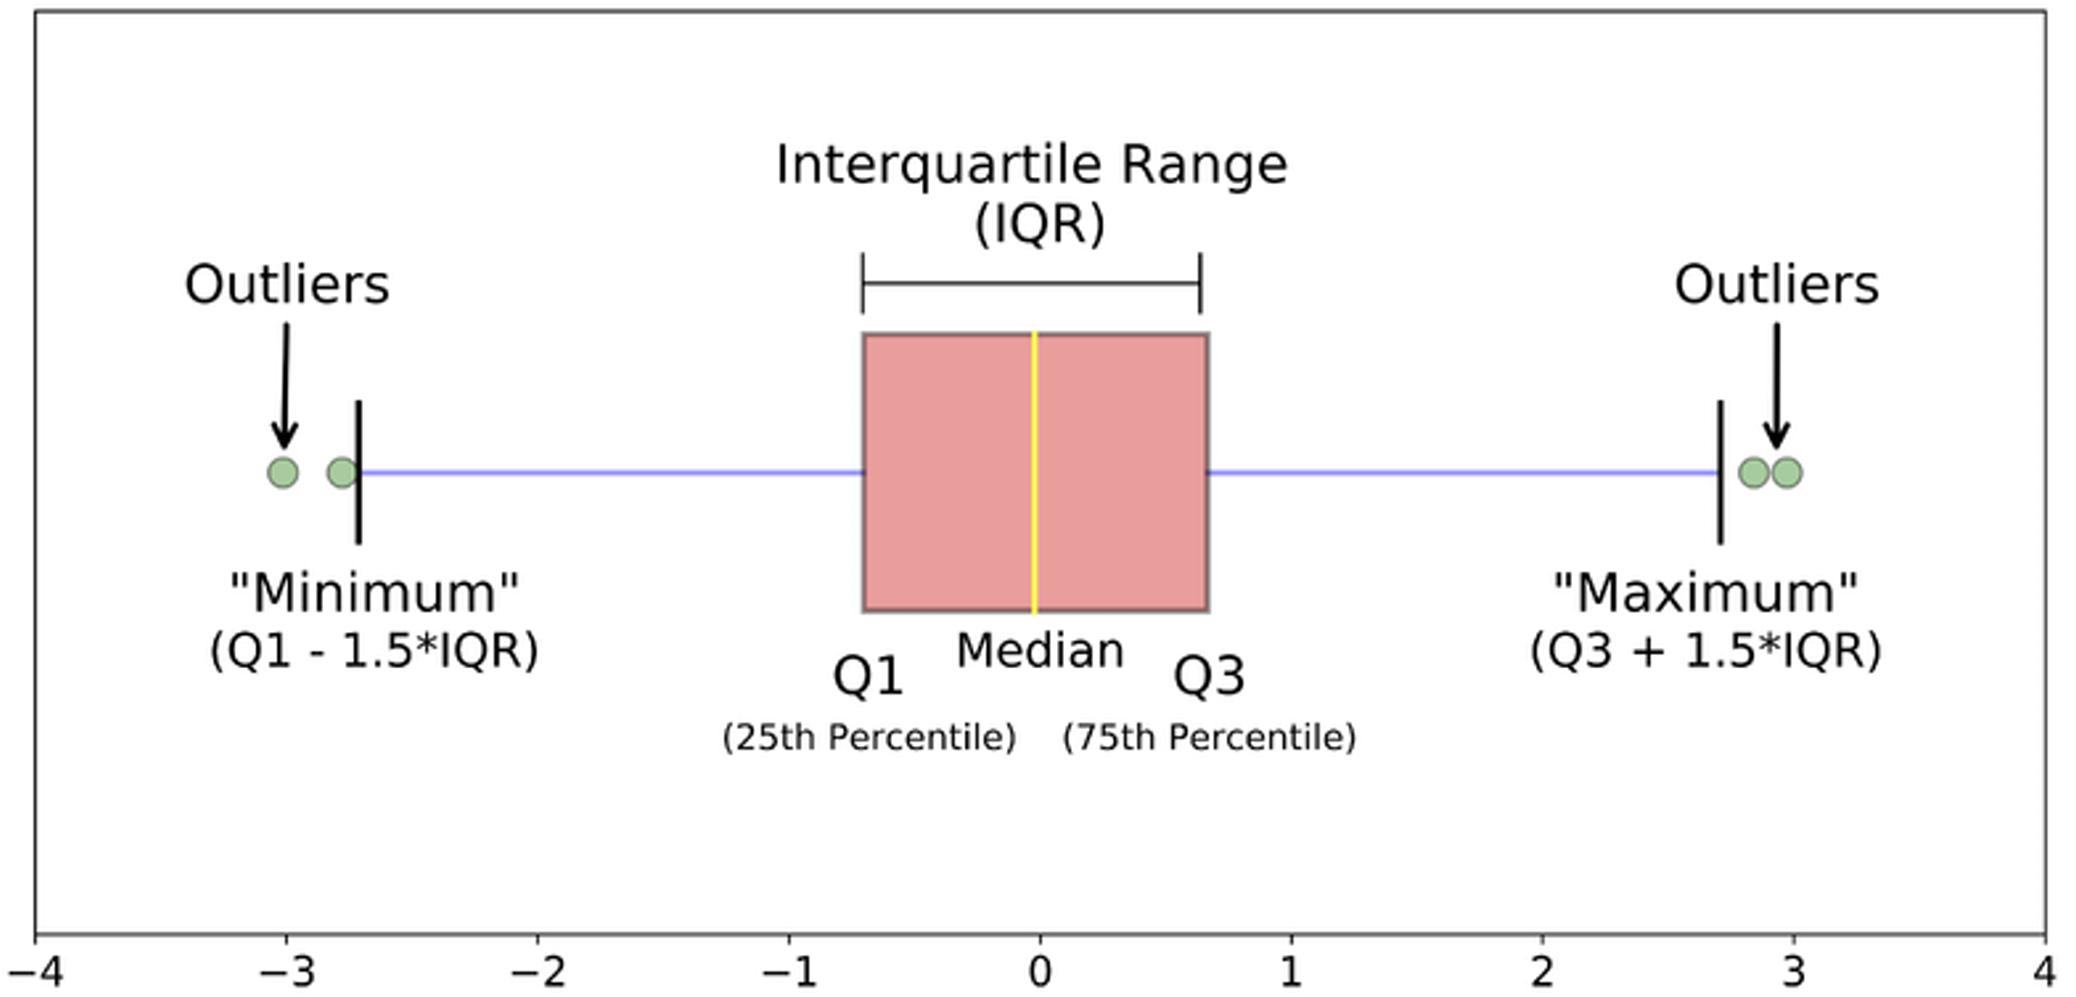

### 이상값 처리 (IQR 기준)

([<matplotlib.axis.XTick at 0x78fdf740d290>,
 [Text(1, 0, 'sepal_length'),
  Text(2, 0, 'sepal_width'),
  Text(3, 0, 'petal_length'),
  Text(4, 0, 'petal_width')])

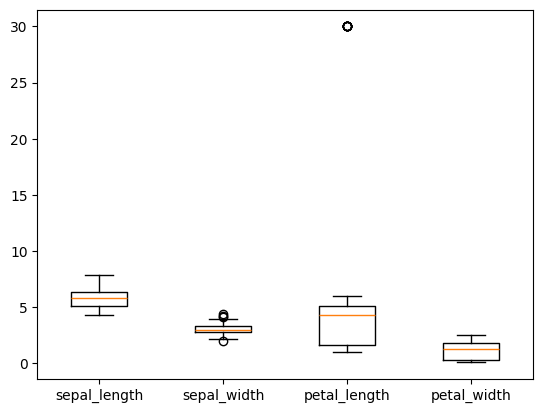

In [40]:
 #결측치처리를수행한df_processed를이어서사용한다.
 # Box Plot을그려시각적으로확인해본다.
 plt.boxplot([df_processed['sepal_length'], df_processed['sepal_width'], df_processed['petal_length'], df_processed['petal_width']])
 plt.xticks([1, 2, 3, 4,],['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [43]:
#시각적으로Outlier을포함하는것으로보이는'petal_length＇에대해이상치확인
# 1사분위수보다1.5 IQR보다작거나3사분위수보다1.5 IQR큰수의Boolean Array를구한 후, 해당하는 데이터를 구한다.
q1, q3 = np.percentile(df_processed['petal_length'], [25, 75])
iqr = q3-q1
lower_bound = q1-(iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
outlier_filter = (df_processed['petal_length'] < lower_bound) | (df_processed['petal_length'] > upper_bound)
df_processed[outlier_filter]

,sepal_length,sepal_width,petal_length,petal_width,Label
105,7.6,3.0,30.0,2.1,virginica
107,7.3,2.9,30.0,1.8,virginica
109,7.2,3.6,30.0,2.5,virginica
117,7.7,3.8,30.0,2.2,virginica
118,7.7,2.6,30.0,2.3,virginica
122,7.7,2.8,30.0,2.0,virginica
130,7.4,2.8,30.0,1.9,virginica
131,7.9,3.8,30.0,2.0,virginica
135,7.7,3.0,30.0,2.3,virginica


In [76]:
#이상치를제거
df_processed2 = df_processed[~outlier_filter]
len(df_processed2)

141

### 이상값 처리 (z-score기준)

z-score(아래 수식 참고)를 구하여 이상값을 확인한다. z-score< -3 또는 z-score > 3인 경우를 Outlier로 보는 것이 일반적이다.


(표준정규분포의 경우 𝜎=1이므로)

|||
|:--|:--|
| $Z = \frac{X - \mu}{\sigma}$ |  
$x$: 원 데이터 (raw data)<br>  
$z$: 표준점수 (standard score, z-score)<br>  
$\mu$: 평균 (mean)<br>  
$\sigma$: 표준편차 (standard deviation) |


In [46]:
# petal_length데이터정규화하기(z-score구하기)
petal_length_avg = df_processed['petal_length'].mean()
petal_length_std = df_processed['petal_length'].std()
z_score = (df_processed['petal_length'] - petal_length_avg) / petal_length_std

(array([0.91162401, 1.19557247, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1345019 ]),
 array([-0.6417548 , -0.19566445,  0.25042589,  0.69651623,  1.14260658,
         1.58869692,  2.03478727,  2.48087761,  2.92696796,  3.3730583 ,
         3.81914865]),
 <BarContainer object of 10 artists>)

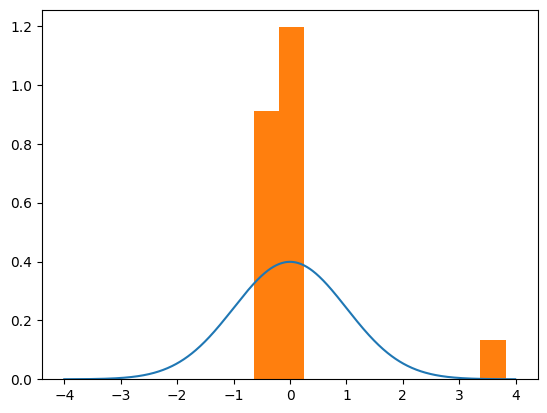

In [48]:
# z-score의 분포를 표준정규분포와 함께plotting하여확인하기
x = np.arange(-4, 4, 0.01)
y = ( lambda x: 1/np.sqrt(2*np.pi)/np.exp(x**2/2))(x)
plt.plot(x, y) #표준정규분포그리기위한데이터만들기
plt.hist(z_score, density=True) #히스토그램의면적이1이 되도록

In [49]:
#이상치확인
outlier_filter2 = ( z_score <-3 ) | ( z_score > 3 )
df_processed[outlier_filter2]

,sepal_length,sepal_width,petal_length,petal_width,Label
105,7.6,3.0,30.0,2.1,virginica
107,7.3,2.9,30.0,1.8,virginica
109,7.2,3.6,30.0,2.5,virginica
117,7.7,3.8,30.0,2.2,virginica
118,7.7,2.6,30.0,2.3,virginica
122,7.7,2.8,30.0,2.0,virginica
130,7.4,2.8,30.0,1.9,virginica
131,7.9,3.8,30.0,2.0,virginica
135,7.7,3.0,30.0,2.3,virginica


In [50]:
#이상치를제거
df_processed2 = df_processed[~outlier_filter2]
len(df_processed2)

141

# 분석용 데이터 준비 - 데이터 정규화

**Z-score 정규화**
- 각각의 수치 값을 앞서 살펴본 $(Z = \frac {X - \mu} {\sigma})$ 로 변환하여 사용한다.
- 만약 데이터의 값이 평균과 일치하면 0으로 정규화되고, 평균보다 작으면 음수, 평균보다 크면 양수로 나타난다. 이때 계산되는 음수와 양수의 크기는 그 데이터의 표준편차에 의해 결정된다.

In [51]:
from sklearn import preprocessing
# https://scikit-learn.org/stable/modules/preprocessing.html

# 결측치/이상치 처리를 수행한 df_processed2를 이어서 사용한다.
columns_to_scale = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [54]:
# z-score스케일링(표준정규화)
df_scaled_standardized = df_processed2.copy()
scaler = preprocessing.StandardScaler()
df_scaled_standardized[columns_to_scale] = scaler.fit_transform(df_processed2[columns_to_scale])
df_scaled_standardized

,sepal_length,sepal_width,petal_length,petal_width,Label
0,-0.879514,1.042826,-1.306697,-1.264248,setosa
1,-1.157567,-0.110417,-1.306697,-1.264248,setosa
2,-1.435620,0.350880,-1.366439,-1.264248,setosa
3,-1.574646,0.004907,-1.246955,-1.264248,setosa
4,-1.018541,1.273475,-1.306697,-1.264248,setosa
...,...,...,...,...,...
145,1.344907,-0.110417,0.963498,1.558857,virginica
146,0.788802,-1.263660,0.844014,1.021123,virginica
147,1.066855,-0.110417,0.963498,1.155557,virginica
148,0.649776,0.812178,1.082982,1.558857,virginica


**최소-최대 정규화(Min-Max Normalization)**
- 각각의 feature에 대해 최소값, 0, 최대값 1로, 그리고 다른 값들은 0과 1 사이의 값으로 변환
- 이상치(Outlier)에 취약한 단점 존재

In [55]:
#표준스케일링(Min-Max정규화)
df_scaled_normalized = df_processed2.copy()
scaler = preprocessing.MinMaxScaler() #min, max값을직접지정해줄수있음. default: 0 ~ 1
df_scaled_normalized[columns_to_scale] = scaler.fit_transform(df_processed2[columns_to_scale])
df_scaled_normalized

,sepal_length,sepal_width,petal_length,petal_width,Label
0,0.275862,0.625000,0.08,0.041667,setosa
1,0.206897,0.416667,0.08,0.041667,setosa
2,0.137931,0.500000,0.06,0.041667,setosa
3,0.103448,0.437500,0.10,0.041667,setosa
4,0.241379,0.666667,0.08,0.041667,setosa
...,...,...,...,...,...
145,0.827586,0.416667,0.84,0.916667,virginica
146,0.689655,0.208333,0.80,0.750000,virginica
147,0.758621,0.416667,0.84,0.791667,virginica
148,0.655172,0.583333,0.88,0.916667,virginica


Text(0.5, 1.0, 'Min-Max scaled data')

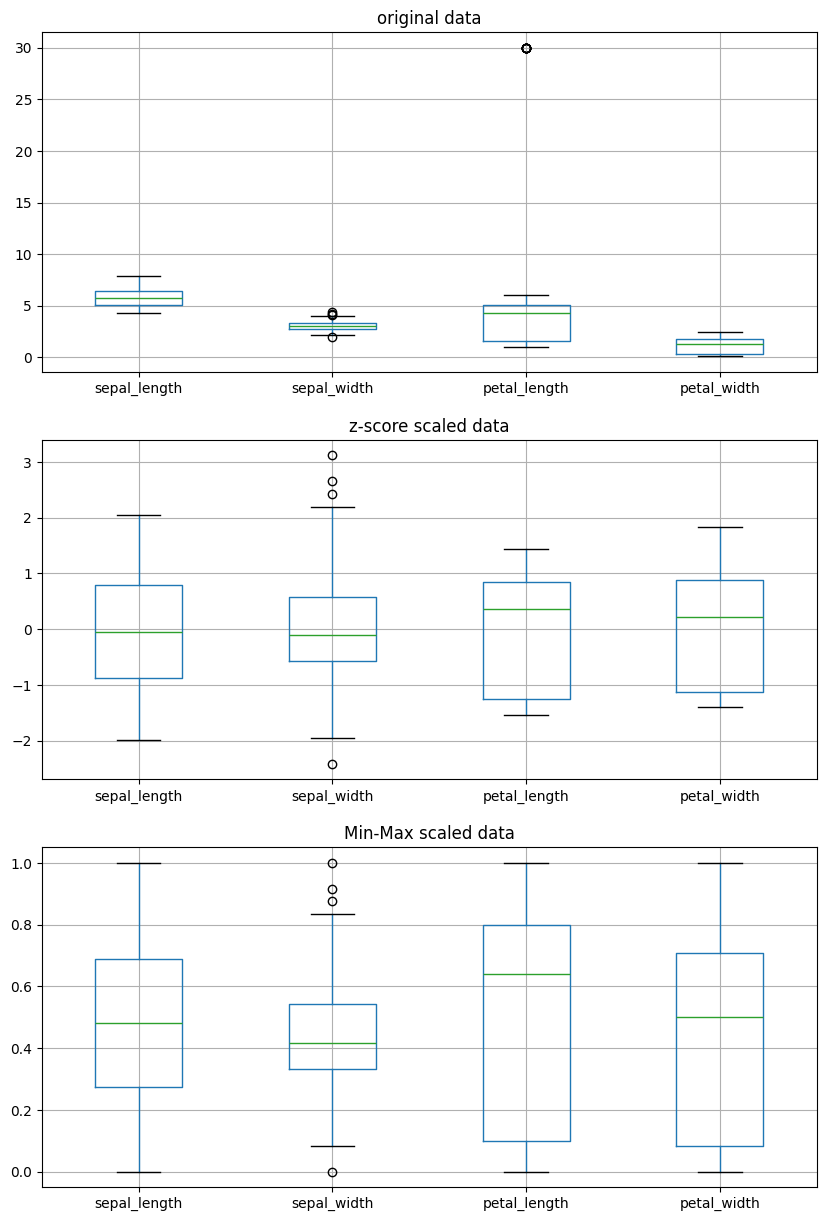

In [56]:
#정규화 결과 비교
plt.figure(figsize=(10,15))
plt.subplot(3, 1, 1)
df_processed[columns_to_scale].boxplot()
plt.title('original data')
plt.subplot(3, 1, 2)
df_scaled_standardized[columns_to_scale].boxplot()
plt.title('z-score scaled data')
plt.subplot(3, 1, 3)
df_scaled_normalized[columns_to_scale].boxplot()
plt.title('Min-Max scaled data')

# 탐색적 분석 - 기초 통계량 추출

In [57]:
# pandas에서 제공하는 기초 통계량 제공 함수를 활용한다.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,139.000000,150.000000,150.000000
mean,5.843333,3.053957,5.172000,1.199333
std,0.828066,0.452732,6.500925,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,30.000000,2.500000


In [59]:
# 앞서 pandas 라이브러리 주요기능에서 살펴본 Column별 unique값, GroupBy를 통한 품종별 통계 등을 탐색해본다.
df.groupby('Label').mean()

,sepal_length,sepal_width,petal_length,petal_width
Label,,,,
setosa,5.006,3.456522,1.462,0.246
versicolor,5.936,2.748936,4.260,1.326
virginica,6.588,2.963043,9.794,2.026


# 탐색적 분석 - 산포도 분석

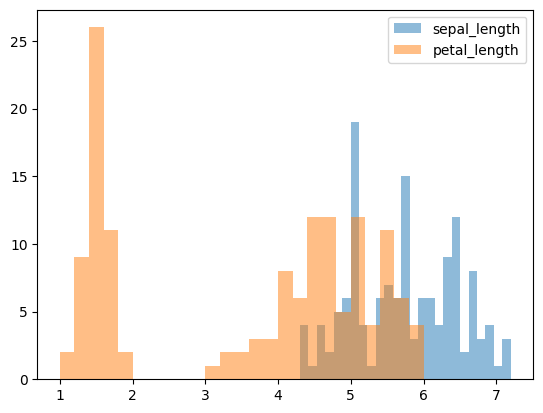

In [60]:
# 히스토그램
hist1 = df_processed2['sepal_length']
hist2 = df_processed2['petal_length']

plt.hist(hist1,label='sepal_length', alpha=0.5, bins=25)
plt.hist(hist2,label='petal_length', alpha=0.5, bins=25)
plt.legend(loc=0)

# 탐색적 분석 - 상관관계 분석

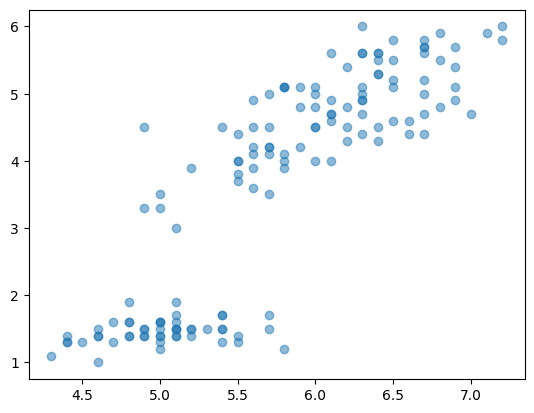

In [61]:
# Scatter Plot
X = df_processed2['sepal_length']
Y = df_processed2['petal_length']

plt.scatter(X, Y, alpha=0.5)

In [62]:
#상관계수구하기
np.corrcoef(X, Y)

array([[1.       , 0.8550094],
       [0.8550094, 1.       ]])

In [65]:
df_processed2

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.50,1.4,0.2,setosa
1,4.9,3.00,1.4,0.2,setosa
2,4.7,3.20,1.3,0.2,setosa
3,4.6,3.05,1.5,0.2,setosa
4,5.0,3.60,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,virginica
146,6.3,2.50,5.0,1.9,virginica
147,6.5,3.00,5.2,2.0,virginica
148,6.2,3.40,5.4,2.3,virginica


In [77]:
#라벨(종)을 이름에서 숫자로 변환
label_map = {name: i for i, name in enumerate(iris.target_names)}
df_processed3 = df_processed2
df_processed3['Label'] = df_processed2['Label'].map(label_map)

/tmp/ipython-input-77-4293949340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed3['Label'] = df_processed2['Label'].map(label_map)


In [79]:
#각Feature간의상관계수구하기
df_processed3.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width,Label
sepal_length,1.000000,-0.183192,0.855009,0.816705,0.769445
sepal_width,-0.183192,1.000000,-0.501227,-0.421625,-0.481437
petal_length,0.855009,-0.501227,1.000000,0.964914,0.946452
petal_width,0.816705,-0.421625,0.964914,1.000000,0.954402
Label,0.769445,-0.481437,0.946452,0.954402,1.000000
